- [doing] MAJORITY REPRESENTATION - Who are the top 10 people that talks the most about climate change over the year ? Does it show an evolution in the general opinions made publicly avaiblable by mainstream media ? What is the current typical profile of a person talking about climate in the media ? Is it the same for other topic ? (Comparaison entre les caractéristiques de personnes les plus représentées dans le QuoteBank vs celles qui parlent du climat) (comparaison des nationalités avec une carte du monde) 

genre faire un plot avec le top 10 de ces speakers football et checker sur internet si on trouve leur opinion, quelqu'un aurait le time de checker ca ?

In [8]:
import pandas as pd
from tqdm import tqdm
from ast import literal_eval 
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and cleaning the data for the analysis

In [148]:
df_speakers = pd.read_csv('data/speaker_attribute.bz2', compression = 'bz2')
dico_clean={} 
length = 0
for date in [2020, 2019, 2018, 2017, 2016, 2015]:
    clean = pd.read_csv(f'data/clean_quotes-{date}.bz2', compression='bz2')
    clean.drop_duplicates(subset=['quotation'], inplace=True)
    dico_clean[date]=clean

In [149]:
dico_clean[2020]

,quoteID,quotation,speaker,qids,date,numOccurrences
0,2020-01-15-079811,the human contribution: changes in greenhouse ...,Gavin Schmidt,['Q1496443'],2020-01-15 21:01:00,1
1,2020-04-03-061496,There's still not a single federal policy to c...,Dan Rutherford,['Q3013192'],2020-04-03 09:50:08,1
2,2020-01-22-084797,The more greenhouse gases you pump into the at...,Malcolm Turnbull,['Q927550'],2020-01-22 00:00:00,7
3,2020-01-30-035904,I love playing with my family and my band and ...,Mitchell Tenpenny,['Q33854640'],2020-01-30 11:01:21,1
4,2020-01-22-014355,Closing the loopholes on current coal investme...,Sarah Wykes,['Q7422923'],2020-01-22 07:01:58,2
...,...,...,...,...,...,...
18377,2020-01-08-012656,"Climate change kicks in,",Peter Gaynor,['Q58326522'],2020-01-08 02:30:00,2
18379,2020-03-23-047987,provisions to force employers to give special ...,Mitch McConnell,['Q355522'],2020-03-23 21:07:45,3
18384,2020-03-06-014713,"For the energy sector, we intend on working to...",Bill Morneau,['Q21175197'],2020-03-06 20:01:31,1
18387,2020-02-19-061285,Our colleagues will also continue to work toge...,Markus Dohle,['Q1901431'],2020-02-19 08:37:21,1


In [150]:
def handle_nan(y) :
    try :
        return literal_eval(y)

    except Exception as e:
        y = y.replace("nan", "0")
        return literal_eval(y)

In [151]:
df_speakers[['nationality', 'gender', 'ethnic_group', 'occupation', 'party', 
             'academic_degree', 'candidacy', 'religion']] = df_speakers[['nationality', 'gender', 'ethnic_group', 'occupation', 'party', 'academic_degree', 'candidacy', 
                                                                         'religion']].applymap(handle_nan)
df_speakers = df_speakers.set_index('id')
df_speakers

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,label,candidacy,religion,climate
id,,,,,,,,,,,
Q42,1952,[United Kingdom],[male],[White British],"[novelist, science fiction writer, children's ...",[],[],Douglas Adams,[],[],0
Q207,1946,[United States of America],[male],[],"[statesperson, military officer, politician, b...",[Republican Party],[],George W. Bush,"[2000 United States presidential election, 200...","[United Methodist Church, Episcopal Church, Me...",1
Q633,1945,"[Canada, United States of America]",[male],[],"[singer-songwriter, singer, pianist, film acto...",[],[],Neil Young,[],[],0
Q640,1969,[Germany],[male],[],"[photographer, Wikimedian]",[],[],Harald Krichel,[],[],0
Q853,1932,"[Soviet Union, Russia]",[male],[],"[biographer, film actor, screenwriter, film di...",[],[],Andrei Tarkovsky,[],[Eastern Orthodox Church],0
...,...,...,...,...,...,...,...,...,...,...,...
Q106403986,1960,[],[male],[],[],[],[],Michael Felix Suarez,[],[],0
Q106405432,2002,[],[],[],[association football player],[],[],Moameen Mutasem,[],[],0
Q106405534,1952,[Belarus],[male],[],"[university teacher, scientist]",[],[Doctor in Engineering],NaN,[],[],0


In [152]:
df_speakers_climate = df_speakers[df_speakers['climate'] == 1]
df_speakers_climate

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,label,candidacy,religion,climate
id,,,,,,,,,,,
Q207,1946,[United States of America],[male],[],"[statesperson, military officer, politician, b...",[Republican Party],[],George W. Bush,"[2000 United States presidential election, 200...","[United Methodist Church, Episcopal Church, Me...",1
Q873,1949,[United States of America],[female],[],"[stage actor, voice actor, film actor, film pr...",[Democratic Party],[],Meryl Streep,[],[atheism],1
Q946,1957,[Poland],[male],[],"[politician, historian]","[Civic Platform, European People's Party]",[],Donald Tusk,[2005 Polish presidential election],[Catholic Church],1
Q1058,1950,[India],[male],"[Gujarati people, Modh]","[bibliographer, politician, writer, social wor...",[Bharatiya Janata Party],[],Narendra Modi,[2014 Indian general election in Vadodara Lok ...,[Hinduism],1
Q1253,1944,[South Korea],[male],[Koreans],"[politician, diplomat]",[independent politician],[],Ban Ki-moon,[],"[Confucianism, Buddhism]",1
...,...,...,...,...,...,...,...,...,...,...,...
Q59572152,1974,[Hungary],[male],[],"[materials scientist, chemist]",[],[],Ákos Kukovecz,[],[],1
Q59601214,1989,[France],[female],[],"[swimmer, politician, humanitarian]",[Unsubmissive France],[],Manon Aubry,[2019 European Parliament election in France],[],1
Q59610153,1939,[],[female],[],[],[],[],Judith Turner,[],[],1


In [153]:
for key,value in dico_clean.items(): 
    df = value.groupby('qids').sum()
    df.index= df.index.map(lambda x: literal_eval(x)[0])
    df = df.rename(columns={'numOccurrences': str(key)})
    df_speakers_climate=df_speakers_climate.join(df)


In [154]:
df_speakers_climate

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,label,candidacy,religion,climate,2020,2019,2018,2017,2016,2015
id,,,,,,,,,,,,,,,,,
Q207,1946,[United States of America],[male],[],"[statesperson, military officer, politician, b...",[Republican Party],[],George W. Bush,"[2000 United States presidential election, 200...","[United Methodist Church, Episcopal Church, Me...",1,NaN,3.0,38.0,18.0,5.0,90.0
Q873,1949,[United States of America],[female],[],"[stage actor, voice actor, film actor, film pr...",[Democratic Party],[],Meryl Streep,[],[atheism],1,NaN,2.0,3.0,NaN,NaN,2.0
Q946,1957,[Poland],[male],[],"[politician, historian]","[Civic Platform, European People's Party]",[],Donald Tusk,[2005 Polish presidential election],[Catholic Church],1,NaN,112.0,43.0,1019.0,NaN,12.0
Q1058,1950,[India],[male],"[Gujarati people, Modh]","[bibliographer, politician, writer, social wor...",[Bharatiya Janata Party],[],Narendra Modi,[2014 Indian general election in Vadodara Lok ...,[Hinduism],1,89.0,1033.0,1431.0,771.0,338.0,2281.0
Q1253,1944,[South Korea],[male],[Koreans],"[politician, diplomat]",[independent politician],[],Ban Ki-moon,[],"[Confucianism, Buddhism]",1,21.0,286.0,85.0,133.0,1143.0,2966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q59572152,1974,[Hungary],[male],[],"[materials scientist, chemist]",[],[],Ákos Kukovecz,[],[],1,NaN,1.0,NaN,NaN,NaN,NaN
Q59601214,1989,[France],[female],[],"[swimmer, politician, humanitarian]",[Unsubmissive France],[],Manon Aubry,[2019 European Parliament election in France],[],1,NaN,3.0,NaN,NaN,NaN,NaN
Q59610153,1939,[],[female],[],[],[],[],Judith Turner,[],[],1,NaN,2.0,NaN,NaN,NaN,NaN


In [155]:
df_speakers_climate = df_speakers_climate.fillna(0)
df_speakers_climate[['2020','2019','2018','2017','2016','2015']]=df_speakers_climate[['2020','2019','2018', '2017', '2016', '2015']].astype(int)

In [156]:
df_speakers_climate

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,label,candidacy,religion,climate,2020,2019,2018,2017,2016,2015
id,,,,,,,,,,,,,,,,,
Q207,1946,[United States of America],[male],[],"[statesperson, military officer, politician, b...",[Republican Party],[],George W. Bush,"[2000 United States presidential election, 200...","[United Methodist Church, Episcopal Church, Me...",1,0,3,38,18,5,90
Q873,1949,[United States of America],[female],[],"[stage actor, voice actor, film actor, film pr...",[Democratic Party],[],Meryl Streep,[],[atheism],1,0,2,3,0,0,2
Q946,1957,[Poland],[male],[],"[politician, historian]","[Civic Platform, European People's Party]",[],Donald Tusk,[2005 Polish presidential election],[Catholic Church],1,0,112,43,1019,0,12
Q1058,1950,[India],[male],"[Gujarati people, Modh]","[bibliographer, politician, writer, social wor...",[Bharatiya Janata Party],[],Narendra Modi,[2014 Indian general election in Vadodara Lok ...,[Hinduism],1,89,1033,1431,771,338,2281
Q1253,1944,[South Korea],[male],[Koreans],"[politician, diplomat]",[independent politician],[],Ban Ki-moon,[],"[Confucianism, Buddhism]",1,21,286,85,133,1143,2966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q59572152,1974,[Hungary],[male],[],"[materials scientist, chemist]",[],[],Ákos Kukovecz,[],[],1,0,1,0,0,0,0
Q59601214,1989,[France],[female],[],"[swimmer, politician, humanitarian]",[Unsubmissive France],[],Manon Aubry,[2019 European Parliament election in France],[],1,0,3,0,0,0,0
Q59610153,1939,[],[female],[],[],[],[],Judith Turner,[],[],1,0,2,0,0,0,0


In [62]:
df_speakers_climate['Total']=df_speakers_climate[['2020','2019','2018','2017','2016','2015']].sum(axis=1)

# Data exploration

## Occupation

In [157]:
df_speakers_climate

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,label,candidacy,religion,climate,2020,2019,2018,2017,2016,2015
id,,,,,,,,,,,,,,,,,
Q207,1946,[United States of America],[male],[],"[statesperson, military officer, politician, b...",[Republican Party],[],George W. Bush,"[2000 United States presidential election, 200...","[United Methodist Church, Episcopal Church, Me...",1,0,3,38,18,5,90
Q873,1949,[United States of America],[female],[],"[stage actor, voice actor, film actor, film pr...",[Democratic Party],[],Meryl Streep,[],[atheism],1,0,2,3,0,0,2
Q946,1957,[Poland],[male],[],"[politician, historian]","[Civic Platform, European People's Party]",[],Donald Tusk,[2005 Polish presidential election],[Catholic Church],1,0,112,43,1019,0,12
Q1058,1950,[India],[male],"[Gujarati people, Modh]","[bibliographer, politician, writer, social wor...",[Bharatiya Janata Party],[],Narendra Modi,[2014 Indian general election in Vadodara Lok ...,[Hinduism],1,89,1033,1431,771,338,2281
Q1253,1944,[South Korea],[male],[Koreans],"[politician, diplomat]",[independent politician],[],Ban Ki-moon,[],"[Confucianism, Buddhism]",1,21,286,85,133,1143,2966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q59572152,1974,[Hungary],[male],[],"[materials scientist, chemist]",[],[],Ákos Kukovecz,[],[],1,0,1,0,0,0,0
Q59601214,1989,[France],[female],[],"[swimmer, politician, humanitarian]",[Unsubmissive France],[],Manon Aubry,[2019 European Parliament election in France],[],1,0,3,0,0,0,0
Q59610153,1939,[],[female],[],[],[],[],Judith Turner,[],[],1,0,2,0,0,0,0


In [174]:
subdata=df_speakers_climatelimate['religion'].explode().value_counts()
subdata

Islam                                    624
Catholic Church                          469
atheism                                  251
Judaism                                  233
Catholicism                              233
                                        ... 
Happy Science                              1
Mennonites                                 1
Buddhism in Sri Lanka                      1
nontheism                                  1
Evangelical-Lutheran Church of Saxony      1
Name: religion, Length: 169, dtype: int64

<AxesSubplot:xlabel='date_of_birth', ylabel='count'>

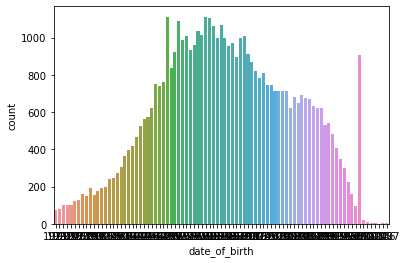

In [164]:
  sns.countplot( data=df_speakers_climate, x='date_of_birth'
                )

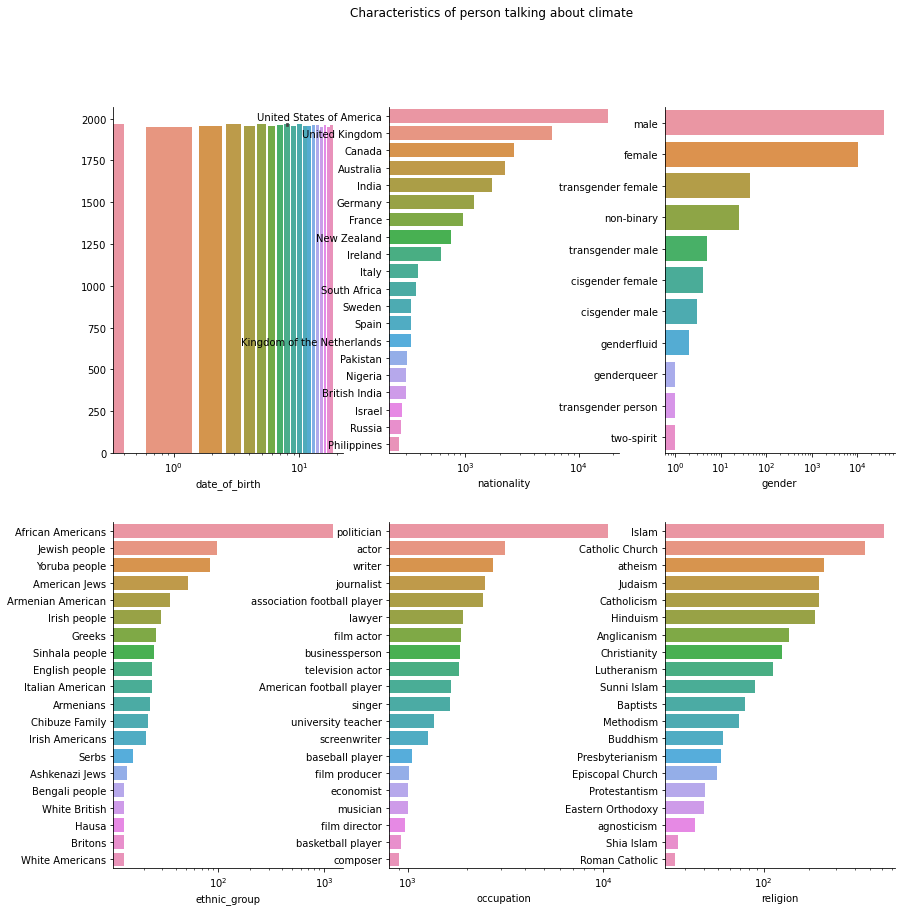

In [180]:
fig, axes = plt.subplots(2,3, figsize=(14,14)) #Creating the figure with the desired number of subplots.
fig.suptitle ('Characteristics of person talking about climate', 
              fontsize= 12)
#Creating a dictionary with plot parameters for every distribution: the subplot, if the element 
#is discrete or not, and the number of bins.  
fig_dic= {"date_of_birth": [axes[0,0]], 
          "nationality": [axes[0,1]], 
          "gender":[axes[0,2]],
          "ethnic_group": [axes[1,0]], 
          "occupation": [axes[1,1]], 
          "religion": [axes[1,2]],

         }
for key, value in fig_dic.items():
    sns.barplot(y=df_speakers_climate[key].explode().value_counts().head(20).index, x=df_speakers_climate[key].explode().value_counts().head(20),
             ax=value[0]
                )
    value[0].set(xscale='log')
    sns.despine()

# Get the top 10 people per year

In [63]:
df_speakers_climate

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,label,candidacy,religion,climate,2020,2019,2018,2017,2016,2015,Total
id,,,,,,,,,,,,,,,,,,
Q207,1946,[United States of America],[male],[],"[statesperson, military officer, politician, b...",[Republican Party],[],George W. Bush,"[2000 United States presidential election, 200...","[United Methodist Church, Episcopal Church, Me...",1,0,4,58,18,7,156,243
Q873,1949,[United States of America],[female],[],"[stage actor, voice actor, film actor, film pr...",[Democratic Party],[],Meryl Streep,[],[atheism],1,0,4,3,0,0,4,11
Q946,1957,[Poland],[male],[],"[politician, historian]","[Civic Platform, European People's Party]",[],Donald Tusk,[2005 Polish presidential election],[Catholic Church],1,0,112,46,1019,0,13,1190
Q1058,1950,[India],[male],"[Gujarati people, Modh]","[bibliographer, politician, writer, social wor...",[Bharatiya Janata Party],[],Narendra Modi,[2014 Indian general election in Vadodara Lok ...,[Hinduism],1,128,1086,1517,781,352,2598,6462
Q1253,1944,[South Korea],[male],[Koreans],"[politician, diplomat]",[independent politician],[],Ban Ki-moon,[],"[Confucianism, Buddhism]",1,24,301,88,141,1233,3154,4941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q59572152,1974,[Hungary],[male],[],"[materials scientist, chemist]",[],[],Ákos Kukovecz,[],[],1,0,1,0,0,0,0,1
Q59601214,1989,[France],[female],[],"[swimmer, politician, humanitarian]",[Unsubmissive France],[],Manon Aubry,[2019 European Parliament election in France],[],1,0,6,0,0,0,0,6
Q59610153,1939,[],[female],[],[],[],[],Judith Turner,[],[],1,0,4,0,0,0,0,4


In [21]:
top_10 = {}

In [160]:
for year in ['2015', '2016', '2017', '2018', '2019', '2020'] :
    cols=['date_of_birth', 'nationality', 'ethnic_group', 'occupation', 'party', 'academic_degree', 'label', 'candidacy', 'religion', year]
    top_10[year]=df_speakers_climate[cols].sort_values(by=[year], inplace=False, ascending=False).head(10)

In [161]:
top_10['2015']

,date_of_birth,nationality,ethnic_group,occupation,party,academic_degree,label,candidacy,religion,2015
id,,,,,,,,,,
Q76,1961,[United States of America],"[African Americans, Multiracial American, Luo ...","[statesperson, politician, lawyer, political w...",[Democratic Party],"[Bachelor of Arts, Juris Doctor]",Barack Obama,[2004 United States Senate election in Illinoi...,"[Protestantism, congregational church, Congreg...",15034
Q1253,1944,[South Korea],[Koreans],"[politician, diplomat]",[independent politician],[],Ban Ki-moon,[],"[Confucianism, Buddhism]",2966
Q4910865,1967,"[Australia, United Kingdom]",[],"[trade unionist, politician, lawyer]",[Australian Labor Party],[],Bill Shorten,[],[],2760
Q5605742,1965,[Australia],[],[politician],[Liberal Party of Australia],[],Greg Hunt,[],[],2633
Q450675,1936,"[Vatican City, Argentina]",[Italian Argentines],"[Roman Catholic priest, Jesuit, chemist, write...",[],[Doctor of Theology],Francis,[],[Catholic Church],2398
Q1058,1950,[India],"[Gujarati people, Modh]","[bibliographer, politician, writer, social wor...",[Bharatiya Janata Party],[],Narendra Modi,[2014 Indian general election in Vadodara Lok ...,[Hinduism],2281
Q157,1954,[France],[],"[statesperson, official, politician, lawyer, m...",[Socialist Party],[],François Hollande,"[2012 French presidential election, 0, 0, Fren...","[Catholicism, agnosticism]",2196
Q359442,1941,[United States of America],[Jewish people],"[university teacher, politician, journalist, t...","[Liberty Union Party, Democratic Party, indepe...",[Bachelor of Arts],Bernie Sanders,[],[Judaism],2015
Q927550,1954,[Australia],[],"[entrepreneur, politician, journalist, lawyer,...",[Liberal Party of Australia],[],Malcolm Turnbull,[],[Catholicism],1974


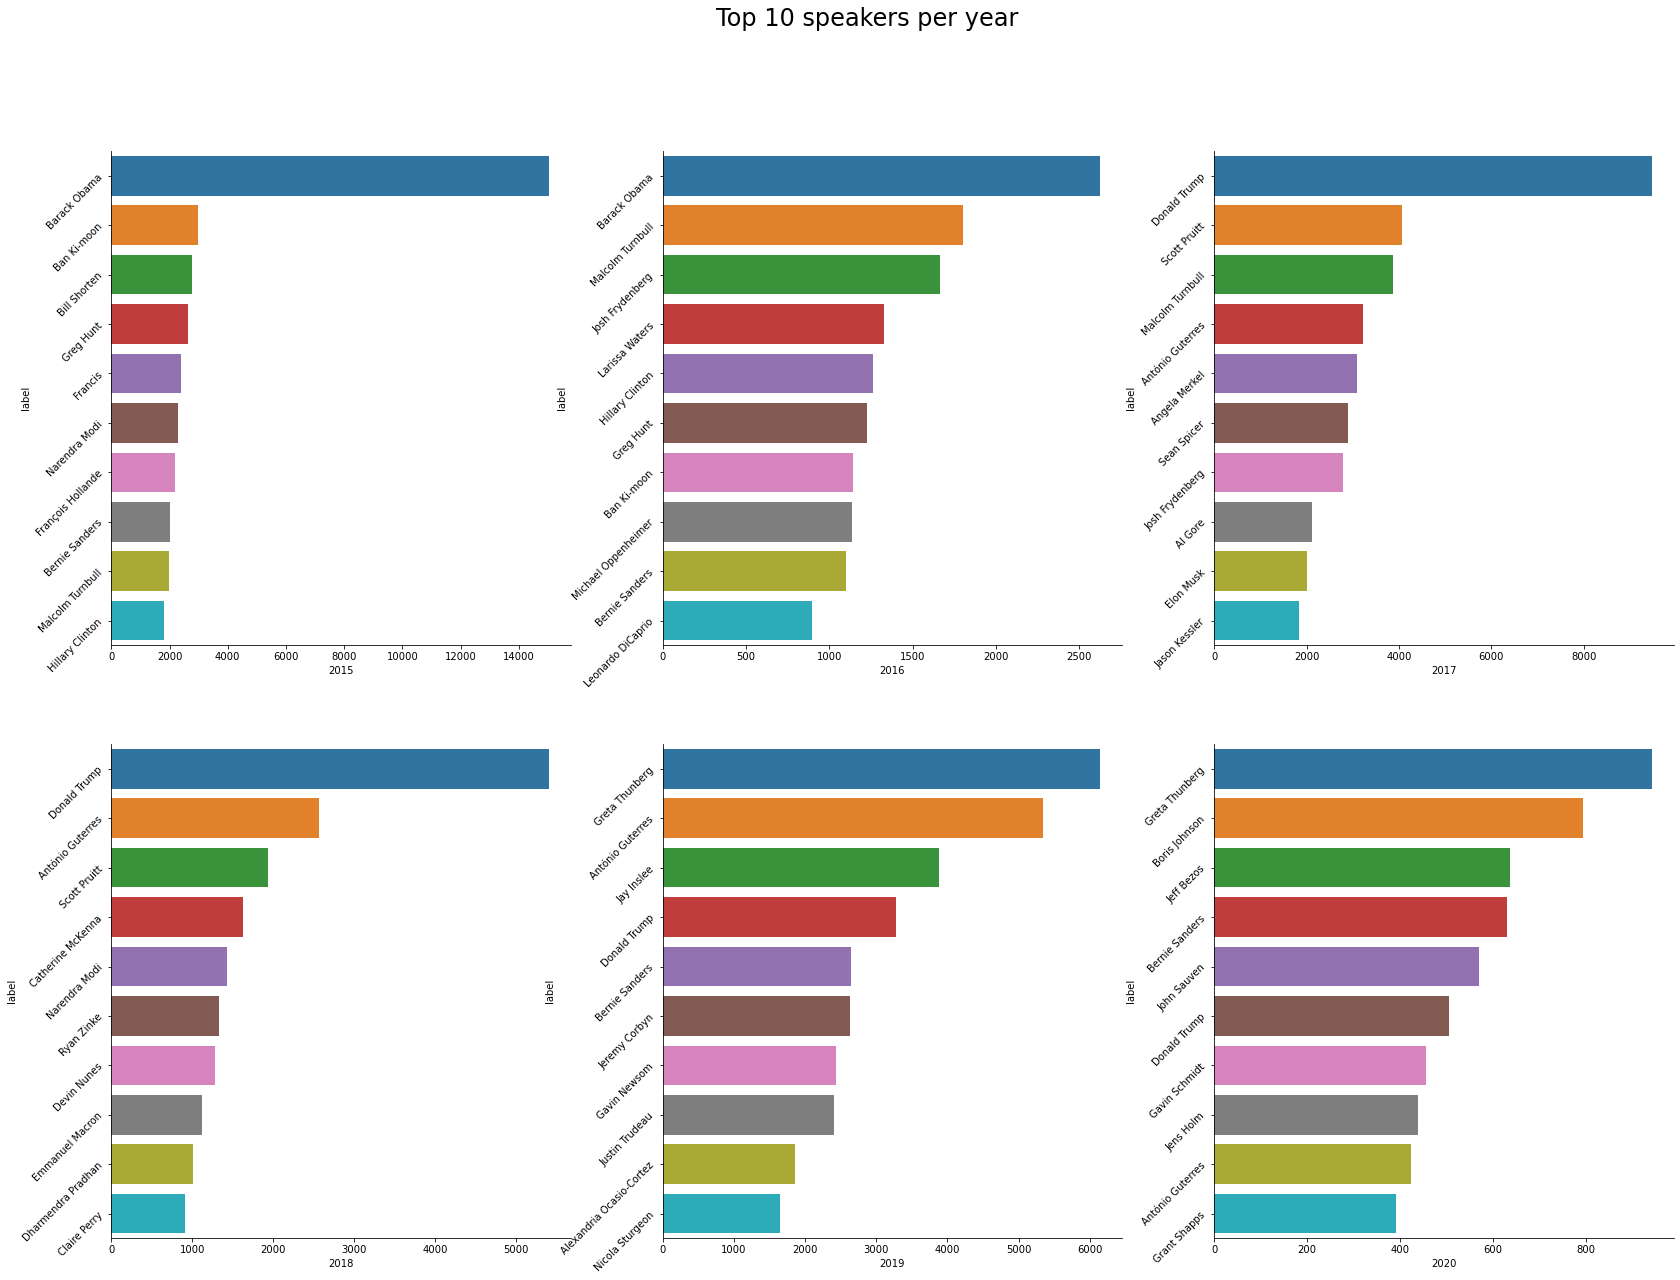

In [162]:
fig, axes = plt.subplots(2,3, figsize=(28,20)) #Creating the figure with the desired number of subplots.
fig.suptitle ('Top 10 speakers per year', 
              fontsize= 24)
#Creating a dictionary with plot parameters for every distribution: the subplot, if the element 
#is discrete or not, and the number of bins.  
fig_dic= {'2015': [axes[0,0]], 
          '2016': [axes[0,1]], 
          '2017':[axes[0,2]],
          '2018': [axes[1,0]], 
          '2019': [axes[1,1]], 
          '2020': [axes[1,2]],

         }
for key, value in fig_dic.items():
    sns.barplot(data=top_10[key], x=key, y='label',
             ax=value[0]
                )
    value[0].tick_params(labelrotation=45, axis='y')
    sns.despine()

# Top quotes

In [144]:
dico_clean[2015]['qids'].tolist()[0]

"['Q56987341']"

In [186]:
dico_clean[2015][dico_clean[2015]['qids'].apply(lambda x:str(x) == "['" + index + "']")]

,quoteID,quotation,speaker,qids,date,numOccurrences
138,2015-12-15-107776,to repel local populations and fuel the refuge...,President Barack Obama,['Q76'],2015-12-15 04:43:25,3
152,2015-10-26-009343,"Because America is leading by example, 150 cou...",President Obama,['Q76'],2015-10-26 19:52:30,1
157,2015-11-09-018877,"Even as our economy has continued to grow, Ame...",President Obama,['Q76'],2015-11-09 22:45:17,3
188,2015-01-09-015364,free for eve... Girls basketball notebook: Rul...,President Barack Obama,['Q76'],2015-01-09 03:37:35,1
189,2015-08-08-005902,biggest driver of climate change.,President Barack Obama,['Q76'],2015-08-08 13:31:06,1
...,...,...,...,...,...,...
62446,2015-08-27-026143,has some fossil fuel interests pretty nervous.,President Obama,['Q76'],2015-08-27 19:45:56,2
62456,2015-12-31-001674,a problem with a carbon footprint.,President Obama,['Q76'],2015-12-31 14:38:50,2
62458,2015-08-04-013422,By combining this with greater investment in o...,Barack Obama,['Q76'],2015-08-04 05:29:16,1
62471,2015-12-13-074717,will help delay or avoid some of the worst con...,President Barack Obama,['Q76'],2015-12-13 18:50:43,4


In [205]:
top_10['2015']['label']

id
Q76              Barack Obama
Q1253             Ban Ki-moon
Q4910865         Bill Shorten
Q5605742            Greg Hunt
Q450675               Francis
Q1058           Narendra Modi
Q157        François Hollande
Q359442        Bernie Sanders
Q927550      Malcolm Turnbull
Q6294         Hillary Clinton
Name: label, dtype: object

In [207]:
for key, value in top_10.items(): 
    print('Most mediated sentence from the top 10 speakers for year ' + key)
    for index, row in value.iterrows():
        year=literal_eval(key)
        print(row['label'] + ' : ' + dico_clean[year].loc[dico_clean[year][dico_clean[year]['qids'].apply(lambda x: str(x) == ("['" + str(index) + "']"))].numOccurrences.idxmax(), 'quotation'])
        

Most mediated sentence from the top 10 speakers for year 2015
Barack Obama : Climate change is not a problem for another generation,
Ban Ki-moon : The Paris Agreement on climate change is a monumental success for the planet and its people.
Bill Shorten : It's a real shame Malcolm Turnbull is following his party on climate change, not leading it,
Greg Hunt : We now need to find out how much blue carbon can be stored by these ecosystems and how this can contribute to emissions reductions,
Francis : Accepting the urgency, it seems clear to me, also, that climate change is a problem which can no longer be left to a future generation,
Narendra Modi : The prosperous still have a strong carbon footprint... [ while ] the countries at the bottom of the development ladder are seeking space to grow,
François Hollande : What is at stake with this climate conference is peace,
Bernie Sanders : climate change is directly related to the growth of terrorism,
Malcolm Turnbull : What we want from Paris..